GDP data cleaning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load the GDP data
file_path = r"/Users/rebo/Documents/LSE/Course 4 - EP/Initial datasets/Additional data/UK GDP_raw.xlsx"
gdp_data = pd.read_excel(file_path)

# Basic data inspection
print("Original GDP data shape:", gdp_data.shape)
print("\nFirst few rows:")
gdp_data.head(10)

Original GDP data shape: (344, 208)

First few rows:


,Title,Gross Value Added - Monthly (Index 1dp) :CVM SA,"Agriculture, Forestry and Fishing (Index 1dp) :CVM SA",Production Industries - Total (Index 1dp) :CVM SA,Mining and Quarrying (Index 1dp) :CVM SA,Manufacturing (Index 1dp) :CVM SA,"Electricity, gas, steam and air conditioning supply(Index 1dp) :CVM SA","Water supply; Sewerage,waste management & remediation activities (Index 1dp) :CVM SA",Construction (Index 1dp) :CVM SA,Service Industries - Total (Index 1dp) :CVM SA,...,Financial and insurance activities (3m on 3m 1 year ago contribution) :CVM SA,Real estate activities (3m on 3m 1 year ago contribution) :CVM SA,"Professional, scientific and technical activities (3m on 3m 1 year ago contribution) :CVM SA",Administrative and Support Service Activities (3m on 3m 1 year ago contribution) :CVM SA,Public admin and defence; Compulsory social security (3m on 3m 1 year ago contribution) :CVM SA,Education (3m on 3m 1 year ago contribution) :CVM SA,Human health and social work activities (3m on 3m 1 year ago contribution) :CVM SA,"Arts, Entertainment and Recreation (3m on 3m 1 year ago contribution) :CVM SA",Other service activities (3m on 3m 1 year ago contribution) :CVM SA,Activities of housholds as employers;Undiff goods & services (3m on 3m 1 year ago contribution) :CVM SA
0,CDID,ECY2,ECY3,ECY4,ECY5,ECY6,ECY7,ECY8,ECY9,ECYC,...,EDNL,EDNM,EDNN,EDNO,EDNP,EDNQ,EDNR,EDNS,EDNT,EDNU
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Release Date,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,...,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025,11-04-2025
4,Next release,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,...,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025,15 May 2025
5,Important Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[The construction growth rates calculated from...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1997 JAN,62,51.2,85.6,504.2,65.6,109.3,109.1,84.5,57.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1997 FEB,62.5,52,85.8,485.8,66.2,106.8,109.8,85.1,58.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1997 MAR,62.6,52.8,84.8,469.2,65.7,102.4,110.5,86.1,58.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1997 APR,63.3,53.9,86.8,468.2,67.3,107.4,112.4,88.2,58.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Drop the unnecessary rows (rows 0-6)
gdp_data = gdp_data.iloc[7:].reset_index(drop=True)

# Clean the column names - handle all variations
gdp_data.columns = [
    col.replace(" (Index 1dp) :CVM SA", "")
       .replace(" :CVM SA", "")
       .replace("(Index 1dp) :CVM SA", "")
       .replace("(Index 1dp)", "")
       .strip() 
    for col in gdp_data.columns
]
# List all the column names
print("All column names after cleaning:")
for i, col in enumerate(gdp_data.columns):
    print(f"{i}: {col}")

print("Shape after dropping and renaming:", gdp_data.shape)
print("\nCleaned first few rows:")
gdp_data.head(10)

All column names after cleaning:
0: Title
1: Gross Value Added - Monthly
2: Agriculture, Forestry and Fishing
3: Production Industries - Total
4: Mining and Quarrying
5: Manufacturing
6: Electricity, gas, steam and air conditioning supply
7: Water supply; Sewerage,waste management & remediation activities
8: Construction
9: Service Industries - Total
10: Wholesale & retail trade; Repair of motor vehicles/cycles
11: Transportation and Storage
12: Accommodation and food service activities
13: Information and communication
14: Financial and insurance activities
15: Real estate activities
16: Professional, scientific and technical activities
17: Administrative and Support Service Activities
18: Public admin and defence; Compulsory social security
19: Education
20: Human health and social work activities
21: Arts, Entertainment and Recreation
22: Other service activities
23: Activities of housholds as employers;Undiff goods & services
24: Gross Value Added - Monthly (period on period growth

,Title,Gross Value Added - Monthly,"Agriculture, Forestry and Fishing",Production Industries - Total,Mining and Quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; Sewerage,waste management & remediation activities",Construction,Service Industries - Total,...,Financial and insurance activities (3m on 3m 1 year ago contribution),Real estate activities (3m on 3m 1 year ago contribution),"Professional, scientific and technical activities (3m on 3m 1 year ago contribution)",Administrative and Support Service Activities (3m on 3m 1 year ago contribution),Public admin and defence; Compulsory social security (3m on 3m 1 year ago contribution),Education (3m on 3m 1 year ago contribution),Human health and social work activities (3m on 3m 1 year ago contribution),"Arts, Entertainment and Recreation (3m on 3m 1 year ago contribution)",Other service activities (3m on 3m 1 year ago contribution),Activities of housholds as employers;Undiff goods & services (3m on 3m 1 year ago contribution)
0,1997 FEB,62.5,52,85.8,485.8,66.2,106.8,109.8,85.1,58.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997 MAR,62.6,52.8,84.8,469.2,65.7,102.4,110.5,86.1,58.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997 APR,63.3,53.9,86.8,468.2,67.3,107.4,112.4,88.2,58.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997 MAY,62.7,54.6,86.3,462.2,66.7,111.1,111.3,88.6,57.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997 JUN,63,55.1,86.6,461.5,67,111.1,111.4,88.3,58.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1997 JUL,63.4,55.7,88.4,479.5,68.4,113.8,112,88.2,58.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1997 AUG,63.4,56.1,87.4,472,67.4,112.7,113.8,87.9,58.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1997 SEP,63.6,56.5,87.8,468.6,68,111.5,112.9,88.4,58.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1997 OCT,64,57.2,89,482.3,69,112.9,109.9,89.8,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1997 NOV,64.2,58.1,89.2,468.5,69.6,112.1,108.9,91.2,59.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Restrict data to 5 GDP index that could potentially be influences by the BoE speeches sentiment.
### Choosing montly growth to match sentiment data date structure.

**Gross Value Added - Monthly (period on period growth)**

This is the core measure that captures overall economic health, which central banks directly seek to influence through policy.


**Financial and insurance activities (period on period growth)**

Given the UK's position as a financial hub, this sector is particularly responsive to central bank communications and sentiment.


**Manufacturing (period on period growth)**

While services dominate, manufacturing remains a critical indicator of economic health that responds to monetary policy signals.


**Information and communication (period on period growth)** 

This forward-looking technology sector represents the UK's third-largest economic segment globally and reacts quickly to economic sentiment.

**Service Industries - Total (period on period growth)**

As services comprise over 80% of the UK economy, this broad measure captures the overall economic response to policy messaging.


***source:*** House of Commons Library

https://commonslibrary.parliament.uk/research-briefings/cbp-8353/:~:text=The%20UK's%20economy%20is%20dominated,fifth%20of%20economic%20output%20altogether

https://commonslibrary.parliament.uk/research-briefings/sn02786/#:~:text=The%20service%20industries%20include%20the,in%20October%20to%20December%202024.


In [4]:
def select_gdp_columns(gdp_data, selected_indicators, date_col="Title"):
    """
    Select only specific GDP indicator columns and date column from the dataframe
    
    Parameters:
        gdp_data : pd.DataFrame -- The cleaned GDP dataframe
        selected_indicators : list -- List of indicator names to keep
        date_col : str, default="title" -- Name of the date column
        
    Returns:
    pd.DataFrame -- DataFrame with only the date column and selected indicators
    """
    # Makeing sure the date column is always included
    matched_cols = [date_col]
    
    # Find columns that match selected indicators
    for col in gdp_data.columns:
        for indicator in selected_indicators:
            if indicator.lower() in col.lower():
                matched_cols.append(col)
                break
    
    # Create the result dataframe with only the matched columns
    res_gdp_data = gdp_data[matched_cols].copy()
    
    # Handle date parsing for format like "1997 JAN"
    try:
        # Try parsing as 'YYYY MMM' format (e.g. '1997 JAN')
        res_gdp_data['date_parsed'] = pd.to_datetime(res_gdp_data[date_col], format='%Y %b', errors='coerce')
    except:
        try:
            # Try standard datetime parsing as fallback
            res_gdp_data['date_parsed'] = pd.to_datetime(res_gdp_data[date_col], errors='coerce')
        except:
            print(f"Warning: Could not parse dates in column '{date_col}'")
            print(f"Sample values: {res_gdp_data[date_col].head().tolist()}")
            # Create placeholder date columns
            res_gdp_data['date_parsed'] = None
    
    # Only create date components if parsing succeeded
    if res_gdp_data['date_parsed'].notna().any():
        res_gdp_data['year_month'] = res_gdp_data['date_parsed'].dt.strftime('%Y-%m')
        res_gdp_data['year'] = res_gdp_data['date_parsed'].dt.year
        res_gdp_data['month'] = res_gdp_data['date_parsed'].dt.month
    
    return res_gdp_data

# Run for the above selection
top5_indicators = [
    "Gross Value Added - Monthly (period on period growth)",
    "Financial and insurance activities (period on period growth)",
    "Manufacturing (period on period growth)",
    "Information and communication (period on period growth)",
    "Service Industries - Total (period on period growth)"
]

res_gdp_data = select_gdp_columns(gdp_data, top5_indicators)

res_gdp_data.head(10)

,Title,Gross Value Added - Monthly (period on period growth),Manufacturing (period on period growth),Service Industries - Total (period on period growth),Information and communication (period on period growth),Financial and insurance activities (period on period growth),date_parsed,year_month,year,month
0,1997 FEB,0.9,0.9,1.1,3.7,0.7,1997-02-01,1997-02,1997,2
1,1997 MAR,0.1,-0.7,0.4,-0.4,-0.7,1997-03-01,1997-03,1997,3
2,1997 APR,1.1,2.4,0.6,2.1,0.7,1997-04-01,1997-04,1997,4
3,1997 MAY,-0.9,-0.8,-1.2,2.1,-1.3,1997-05-01,1997-05,1997,5
4,1997 JUN,0.5,0.5,0.6,1.4,1.2,1997-06-01,1997-06,1997,6
5,1997 JUL,0.6,2,0.2,-0.6,1.2,1997-07-01,1997-07,1997,7
6,1997 AUG,0,-1.4,0.4,2.5,-0.5,1997-08-01,1997-08,1997,8
7,1997 SEP,0.3,1,0.1,4.3,-4.4,1997-09-01,1997-09,1997,9
8,1997 OCT,0.7,1.5,0.5,4,-3.4,1997-10-01,1997-10,1997,10
9,1997 NOV,0.3,0.8,0.2,3.7,0.1,1997-11-01,1997-11,1997,11


In [5]:
# Remove redundant columns and check the rest for anomalities
clean_gdp_data = res_gdp_data.drop(columns=["Title", "date_parsed"])

print("\n--- Clean GDP Dataset ---\n")
display(clean_gdp_data.info())
display(clean_gdp_data.describe())
display(clean_gdp_data.isnull().sum())




--- Clean GDP Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Gross Value Added - Monthly (period on period growth)         337 non-null    object
 1   Manufacturing (period on period growth)                       337 non-null    object
 2   Service Industries - Total (period on period growth)          337 non-null    object
 3   Information and communication (period on period growth)       337 non-null    object
 4   Financial and insurance activities (period on period growth)  337 non-null    object
 5   year_month                                                    337 non-null    object
 6   year                                                          337 non-null    int32 
 7   month                                                

None

,year,month
count,337.000000,337.000000
mean,2010.626113,6.486647
std,8.120537,3.460745
min,1997.000000,1.000000
25%,2004.000000,3.000000
50%,2011.000000,6.000000
75%,2018.000000,9.000000
max,2025.000000,12.000000


Gross Value Added - Monthly (period on period growth)           0
Manufacturing (period on period growth)                         0
Service Industries - Total (period on period growth)            0
Information and communication (period on period growth)         0
Financial and insurance activities (period on period growth)    0
year_month                                                      0
year                                                            0
month                                                           0
dtype: int64

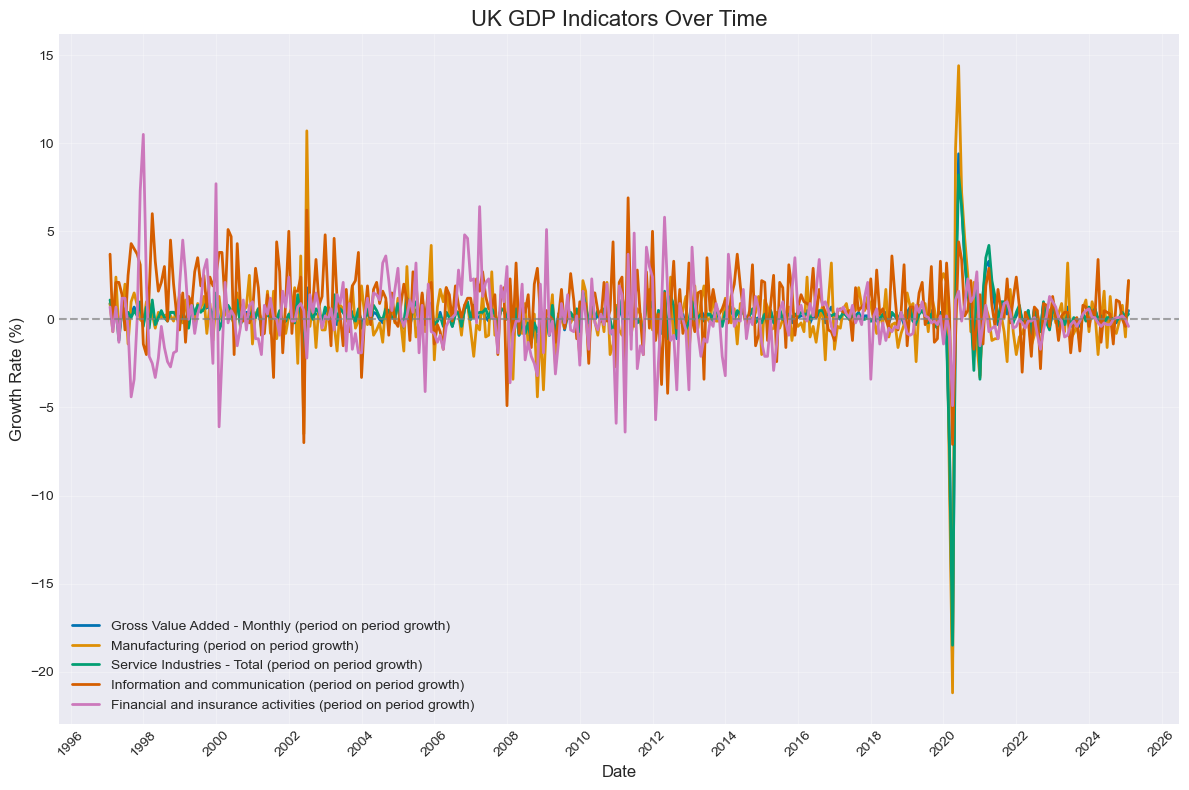

In [20]:
# Basic visualization of the index growth over time

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("colorblind")

def plot_gdp_indicators(data, date_col='year_month'):
    """
    Plot multiple GDP indicators as line charts over time
    
    Parameters:
        data : pd.DataFrame -- The cleaned GDP dataframe
        date_col : str -- Column to use for x-axis dates
    """
    # Convert year_month to datetime for better x-axis formatting
    if date_col == 'year_month':
        data['plot_date'] = pd.to_datetime(data['year_month'])
    else:
        # If using a numerical date field, create a datetime
        data['plot_date'] = pd.to_datetime(data['year'].astype(str) + '-' + 
                                          data['month'].astype(str).str.zfill(2))
    
    # Get the GDP indicator columns (exclude date/time columns)
    date_related_cols = ['year_month', 'year', 'month', 'plot_date']
    indicator_cols = [col for col in data.columns if col not in date_related_cols]
    
    # Create the figure and axis
    plt.figure(figsize=(12, 8))
    
    # Plot each indicator
    for col in indicator_cols:
        plt.plot(data['plot_date'], data[col], linewidth=2, label=col)
    
    # Format the plot
    plt.title('UK GDP Indicators Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Growth Rate (%)', fontsize=12)
    plt.legend(fontsize=10)
    
    # Format the x-axis to show years nicely
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
    plt.xticks(rotation=45)
    
    # Add a horizontal line at y=0 to highlight positive/negative growth
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Ensure the layout looks good
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return plt

# Create the plot
plot = plot_gdp_indicators(clean_gdp_data)

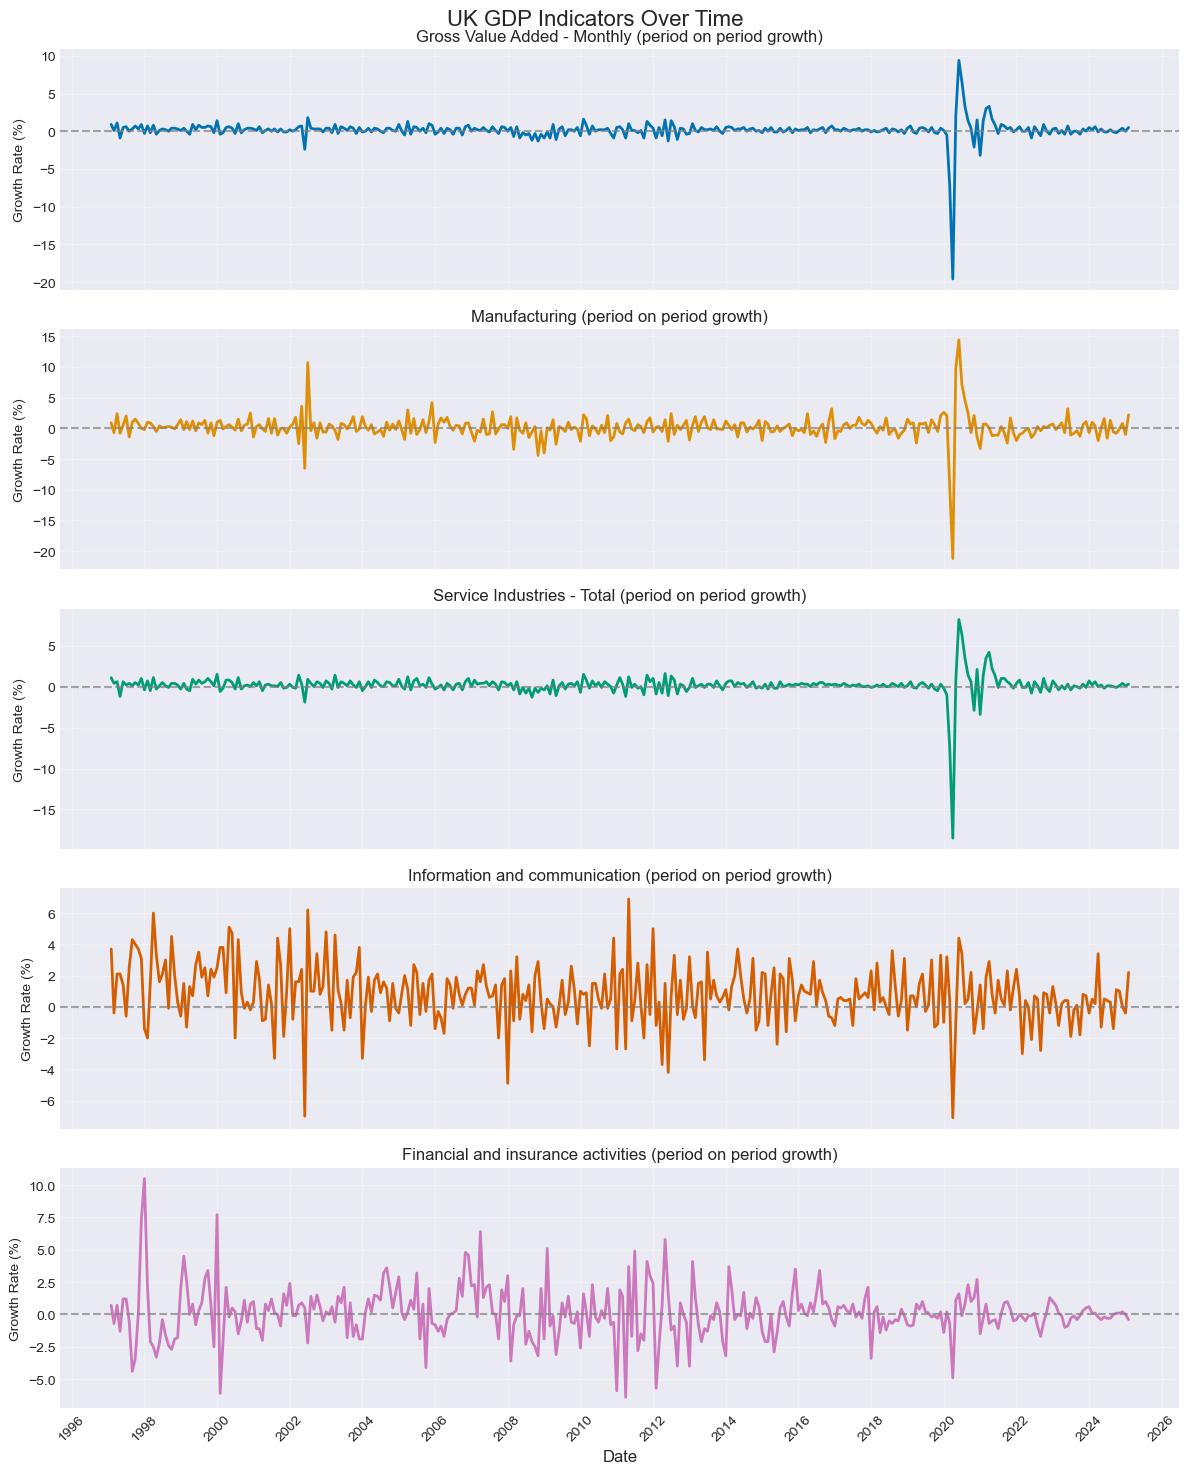

In [12]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("colorblind")

def plot_individual_gdp_indicators(data, date_col='year_month'):
    """
    Plot each GDP indicator as a separate line chart over time
    
    Parameters:
        data : pd.DataFrame -- The cleaned GDP dataframe
        date_col : str -- Column to use for x-axis dates
    """
    # Convert year_month to datetime for better x-axis formatting
    if date_col == 'year_month':
        data['plot_date'] = pd.to_datetime(data['year_month'])
    else:
        # If using a numerical date field, create a datetime
        data['plot_date'] = pd.to_datetime(data['year'].astype(str) + '-' + 
                                          data['month'].astype(str).str.zfill(2))
    
    # Get the GDP indicator columns (exclude date/time columns)
    date_related_cols = ['year_month', 'year', 'month', 'plot_date']
    indicator_cols = [col for col in data.columns if col not in date_related_cols]
    
    # Create a figure with 5 subplots (1 row, 5 columns)
    fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)
    
    # Plot each indicator in its own subplot
    for i, col in enumerate(indicator_cols):
        axes[i].plot(data['plot_date'], data[col], linewidth=2, color=sns.color_palette("colorblind")[i])
        
        # Add title and y-label to each subplot
        axes[i].set_title(col, fontsize=12)
        axes[i].set_ylabel('Growth Rate (%)', fontsize=10)
        
        # Add a horizontal line at y=0 to highlight positive/negative growth
        axes[i].axhline(y=0, color='gray', linestyle='--', alpha=0.7)
        
        # Add grid for better readability
        axes[i].grid(True, alpha=0.3)
    
    # Format the x-axis to show years nicely (only for the bottom subplot)
    axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[-1].xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
    axes[-1].set_xlabel('Date', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add a main title for the entire figure
    fig.suptitle('UK GDP Indicators Over Time', fontsize=16, y=0.98)
    
    # Ensure the layout looks good
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return fig

# Create the individual plots
fig = plot_individual_gdp_indicators(clean_gdp_data)

In [13]:
# Save the clean data to a CSV file
clean_gdp_data.to_csv('clean_gdp_data.csv', index=False)
print("\nClean GDP data saved to 'clean_gdp_data.csv'")


Clean GDP data saved to 'clean_gdp_data.csv'


### Import dictionary based BoE sentiment data for correlation check

In [35]:
# Load the sentiment data
file_path = r"/Users/rebo/Documents/LSE/Course 4 - EP/groupwork/boe_speeches_sentiment.csv"
boe_sentiment_df = pd.read_csv(file_path)
boe_sentiment_df.head(10)

,year,month,speech_length,author,is_gov,sentiment_score
0,1998,9,2387,george,1,-21
1,1998,10,4045,george,1,-5
2,1998,10,2311,king,1,-28
3,1998,11,4690,budd,0,-35
4,1998,11,4452,vickers,0,-56
5,1998,11,2363,george,1,-29
6,1998,12,6144,governor,0,-98
7,1998,12,4574,buiter,0,-53
8,1999,1,2550,george,1,-53
9,1999,1,2434,george,1,-11


In [37]:
# Ensure both dataframes have the same data types for join columns
clean_gdp_data['year'] = clean_gdp_data['year'].astype(int)
clean_gdp_data['month'] = clean_gdp_data['month'].astype(int)
boe_sentiment_df['year'] = boe_sentiment_df['year'].astype(int)
boe_sentiment_df['month'] = boe_sentiment_df['month'].astype(int)

In [43]:
# Merge the datasets on year and month with left join from sentiment to GDP to keep all sentiment data and add GDP data where available
merged_data = pd.merge(
    boe_sentiment_df, 
    clean_gdp_data,
    on=['year', 'month'],
    how='left')

merged_data.head(15)

,year,month,speech_length,author,is_gov,sentiment_score,Gross Value Added - Monthly (period on period growth),Manufacturing (period on period growth),Service Industries - Total (period on period growth),Information and communication (period on period growth),Financial and insurance activities (period on period growth),year_month,plot_date
0,1998,9,2387,george,1,-21,0,0.3,-0.1,-0.1,-2.4,1998-09,1998-09-01
1,1998,10,4045,george,1,-5,0.4,0.2,0.4,4.5,-2.7,1998-10,1998-10-01
2,1998,10,2311,king,1,-28,0.4,0.2,0.4,4.5,-2.7,1998-10,1998-10-01
3,1998,11,4690,budd,0,-35,0.4,-0.1,0.4,2,-1.9,1998-11,1998-11-01
4,1998,11,4452,vickers,0,-56,0.4,-0.1,0.4,2,-1.9,1998-11,1998-11-01
5,1998,11,2363,george,1,-29,0.4,-0.1,0.4,2,-1.9,1998-11,1998-11-01
6,1998,12,6144,governor,0,-98,0.3,0.6,0.2,0.3,-1.8,1998-12,1998-12-01
7,1998,12,4574,buiter,0,-53,0.3,0.6,0.2,0.3,-1.8,1998-12,1998-12-01
8,1999,1,2550,george,1,-53,0.1,1.4,-0.3,-0.6,2,1999-01,1999-01-01
9,1999,1,2434,george,1,-11,0.1,1.4,-0.3,-0.6,2,1999-01,1999-01-01


In [45]:
# Check for errors
display(merged_data.info())
display(merged_data.describe())
display(merged_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   year                                                          1209 non-null   int32         
 1   month                                                         1209 non-null   int32         
 2   speech_length                                                 1209 non-null   int64         
 3   author                                                        1209 non-null   object        
 4   is_gov                                                        1209 non-null   int64         
 5   sentiment_score                                               1209 non-null   int64         
 6   Gross Value Added - Monthly (period on period growth)         1209 non-null   object        
 7   Manufa

None

,year,month,speech_length,is_gov,sentiment_score,plot_date
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209
mean,2012.301902,6.396195,4278.254756,0.202647,-34.711332,2012-10-01 04:10:07.444168704
min,1998.000000,1.000000,231.000000,0.000000,-979.000000,1998-09-01 00:00:00
25%,2008.000000,3.000000,2560.000000,0.000000,-55.000000,2008-04-01 00:00:00
50%,2013.000000,6.000000,3675.000000,0.000000,-26.000000,2013-11-01 00:00:00
75%,2018.000000,10.000000,5006.000000,0.000000,-2.000000,2018-02-01 00:00:00
max,2022.000000,12.000000,37522.000000,1.000000,486.000000,2022-10-01 00:00:00
std,6.499160,3.407630,3186.750556,0.402138,69.144310,NaN


year                                                            0
month                                                           0
speech_length                                                   0
author                                                          0
is_gov                                                          0
sentiment_score                                                 0
Gross Value Added - Monthly (period on period growth)           0
Manufacturing (period on period growth)                         0
Service Industries - Total (period on period growth)            0
Information and communication (period on period growth)         0
Financial and insurance activities (period on period growth)    0
year_month                                                      0
plot_date                                                       0
dtype: int64

In [47]:
# Check the date frame of the dataset
def get_year_month_range(df):
    """
    Returns the min and max values of the 'year_month' column.
    Assumes 'year_month' is in YYYY-MM format.
    """
    if 'year_month' not in df.columns:
        raise ValueError("Column 'year_month' not found in DataFrame.")
    
    min_ym = df['year_month'].min()
    max_ym = df['year_month'].max()
    
    print(f"Year-Month range: {min_ym} to {max_ym}")
    return min_ym, max_ym

#Run for 
get_year_month_range(merged_data)

Year-Month range: 1998-09 to 2022-10


('1998-09', '2022-10')

#### To be filled....


In [54]:
# Define the GDP indicators we want to analyze
gdp_indicators = [
    'Gross Value Added - Monthly (period on period growth)',
    'Manufacturing (period on period growth)',
    'Service Industries - Total (period on period growth)',
    'Information and communication (period on period growth)',
    'Financial and insurance activities (period on period growth)'
]

# Extract just the columns we need for correlation analysis
correlation_data = merged_data[['sentiment_score'] + gdp_indicators].copy()

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Display the correlation results
print("Correlation between sentiment score and GDP indicators:")
print(corr_matrix['sentiment_score'][1:])  # Skip the first row which is correlation with itself



Correlation between sentiment score and GDP indicators:
Gross Value Added - Monthly (period on period growth)          -0.074957
Manufacturing (period on period growth)                        -0.073366
Service Industries - Total (period on period growth)           -0.072786
Information and communication (period on period growth)         0.038129
Financial and insurance activities (period on period growth)   -0.022823
Name: sentiment_score, dtype: float64


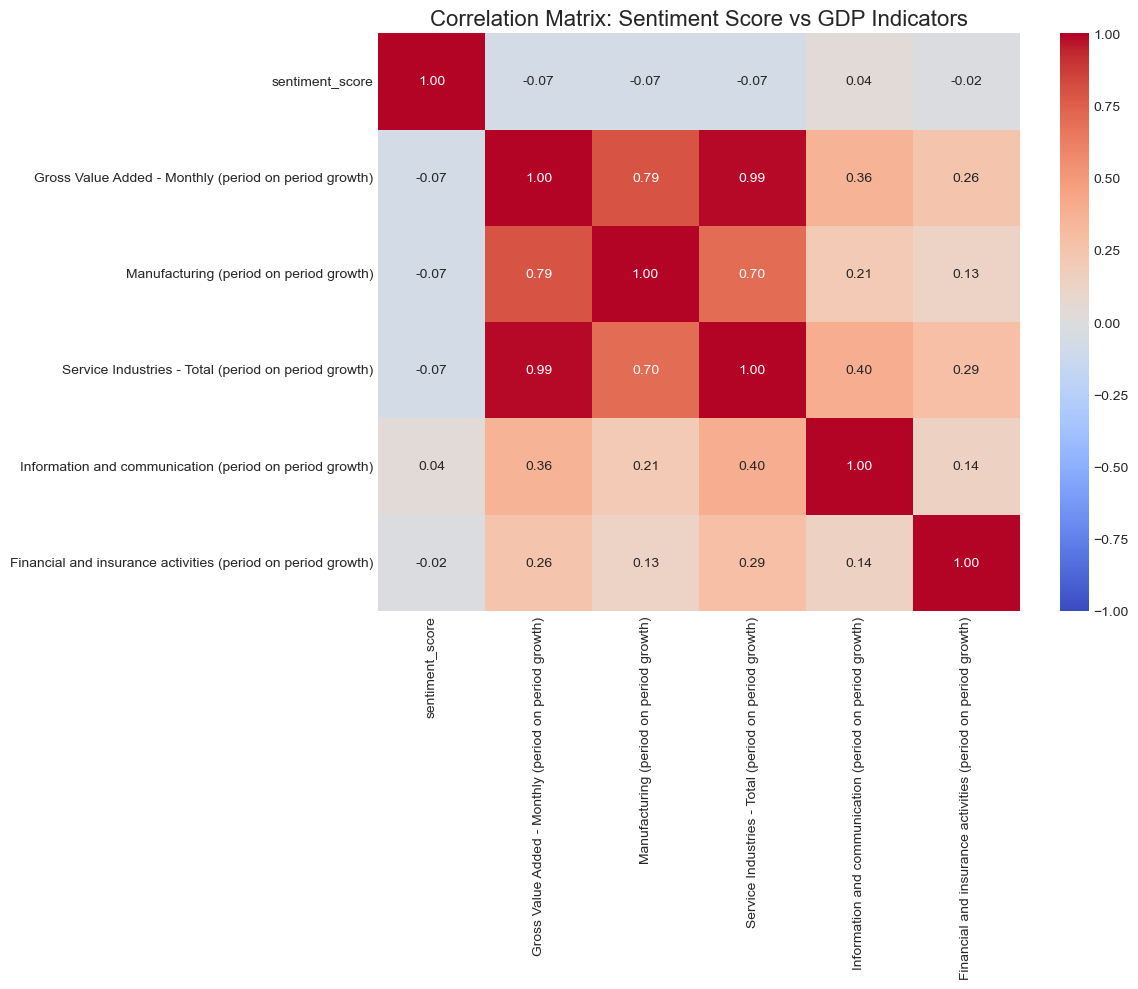

In [56]:
# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: Sentiment Score vs GDP Indicators', fontsize=16)
plt.tight_layout()
plt.show()

In [62]:
# Make sure all values are numeric and handle any problematic values
def clean_for_correlation(data, columns):
    """Clean dataframe columns to ensure they're numeric for correlation analysis"""
    clean_data = data[columns].copy()
    
    # Print data types before conversion
    print("Data types before cleaning:")
    print(clean_data.dtypes)
    
    # Convert all columns to numeric, coercing errors to NaN
    for col in clean_data.columns:
        clean_data[col] = pd.to_numeric(clean_data[col], errors='coerce')
    
    # Print data types after conversion
    print("\nData types after cleaning:")
    print(clean_data.dtypes)
    
    # Check for NaN values created during conversion
    nan_count = clean_data.isna().sum()
    print("\nNaN values after conversion:")
    print(nan_count)
    
    # Drop rows with NaN values
    clean_data = clean_data.dropna()
    print(f"\nRows remaining after removing NaN: {len(clean_data)}")
    
    return clean_data

Data types before cleaning:
sentiment_score                                                  int64
Gross Value Added - Monthly (period on period growth)           object
Manufacturing (period on period growth)                         object
Service Industries - Total (period on period growth)            object
Information and communication (period on period growth)         object
Financial and insurance activities (period on period growth)    object
dtype: object

Data types after cleaning:
sentiment_score                                                   int64
Gross Value Added - Monthly (period on period growth)           float64
Manufacturing (period on period growth)                         float64
Service Industries - Total (period on period growth)            float64
Information and communication (period on period growth)         float64
Financial and insurance activities (period on period growth)    float64
dtype: object

NaN values after conversion:
sentiment_score             

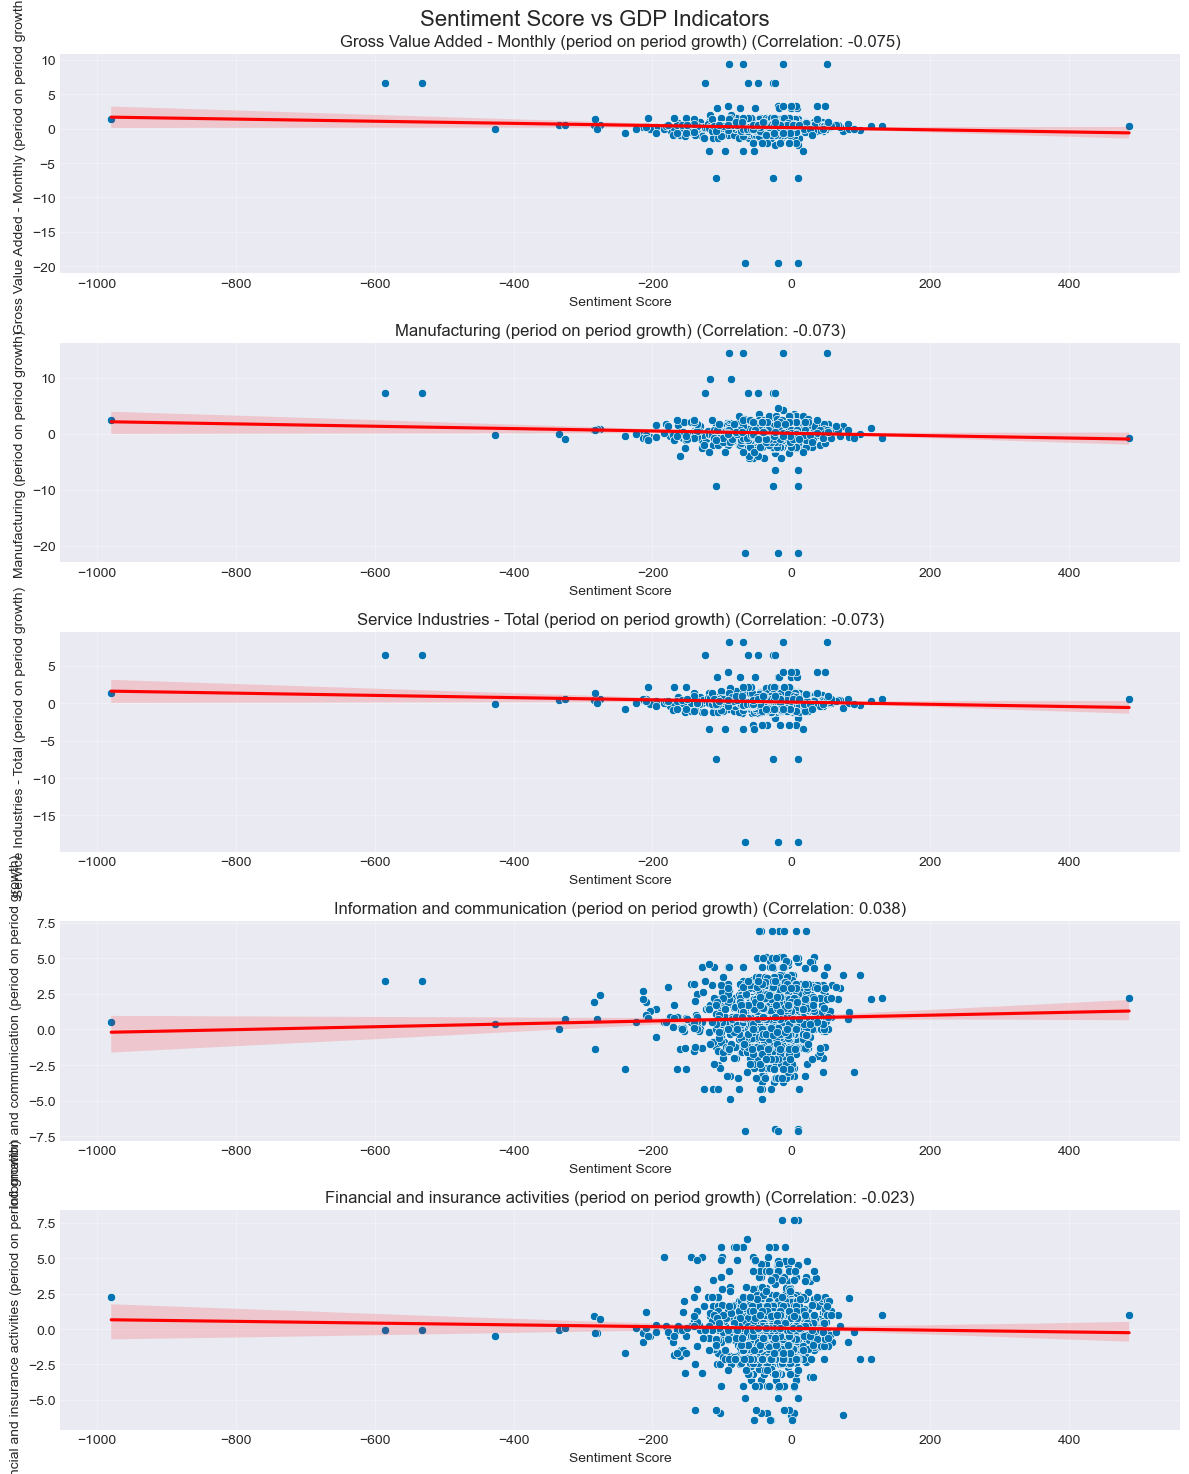

In [64]:
# Define the GDP indicators
gdp_indicators = [
    'Gross Value Added - Monthly (period on period growth)',
    'Manufacturing (period on period growth)',
    'Service Industries - Total (period on period growth)',
    'Information and communication (period on period growth)',
    'Financial and insurance activities (period on period growth)'
]

# Clean the data for correlation analysis
correlation_data = clean_for_correlation(merged_data, ['sentiment_score'] + gdp_indicators)

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Now create the scatter plots with the cleaned data
fig, axes = plt.subplots(len(gdp_indicators), 1, figsize=(12, 15))
fig.suptitle('Sentiment Score vs GDP Indicators', fontsize=16)

for i, indicator in enumerate(gdp_indicators):
    sns.scatterplot(x='sentiment_score', y=indicator, data=correlation_data, ax=axes[i])
    
    # Add regression line
    sns.regplot(x='sentiment_score', y=indicator, data=correlation_data, 
                scatter=False, ax=axes[i], line_kws={"color":"red"})
    
    # Calculate correlation coefficient
    corr = corr_matrix.loc['sentiment_score', indicator]
    axes[i].set_title(f'{indicator} (Correlation: {corr:.3f})')
    axes[i].set_xlabel('Sentiment Score')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()